In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
# Reading datatset
df = pd.read_csv("train.csv")

In [3]:
labels = pd.read_csv('labels.csv')

# Exploratory Data Analysis

Hence, we will be doing the exploratory data analysis in order to identify the significant(important) parameters contributing to the mortality rate and neglecting the rest.


In [4]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [5]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [6]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [7]:
df.shape

(3999, 42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [9]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [10]:
labels.shape

(3999, 1)

In [11]:
labels

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [12]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   In-hospital_death  3999 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


# One Hot Encoding 
is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [14]:
temp  =[]
for label in labels["In-hospital_death"]:
  if label == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [15]:
print(temp.shape)

(3999, 2)


In [16]:
# concating df and labels in a single dataframe(new)
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


<AxesSubplot:>

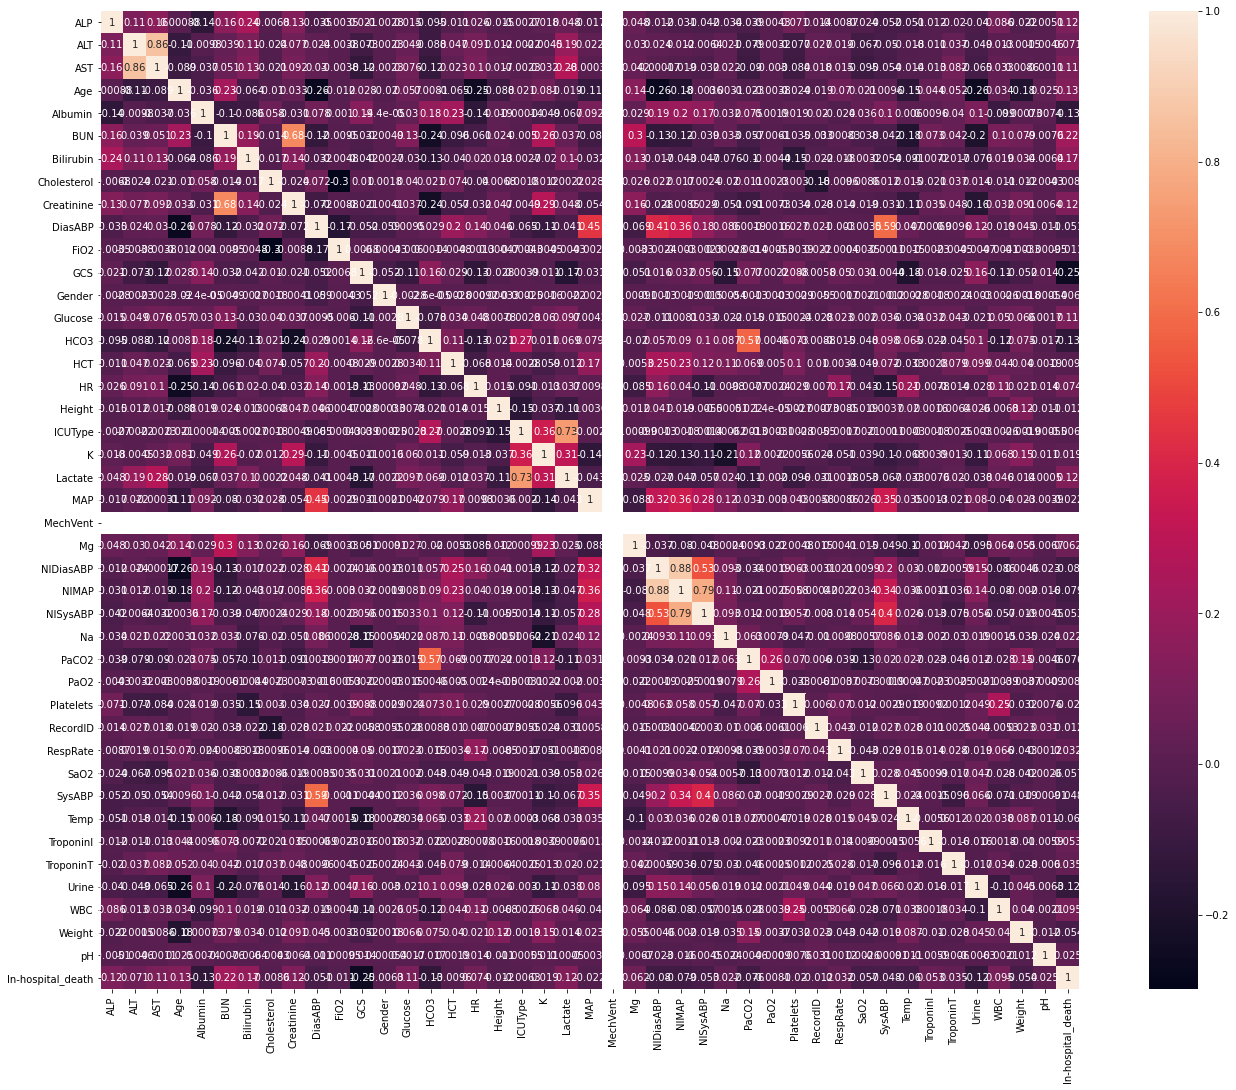

In [17]:
#Heat map
correlation_map = new[new.columns].corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map,square=True,annot=True)

In [18]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [19]:
df = new_df

In [20]:
df = df.drop(['Gender','Cholesterol','HCT','ICUType','Height'],axis=1)

# Scaling Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

# Deep learning Model
dataframe df will be given as x parameter and In-hospital_death case will be given in y parameter 


In [22]:

x = df
y = temp

In [23]:
print(x.shape,"\n")
print(y.shape)

(3999, 37) 

(3999, 2)


# Splitting Datatset

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2799, 37)
(1200, 37)
(2799, 2)
(1200, 2)


In [26]:
# importing important libraries 
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam


In [36]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1] , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                2432      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_15 (Dense)             (None, 196)               38612     
_________________________________________________________________
batch_normalization_2 (Batch (None, 196)               784       
_________________________________________________________________
dense_16 (Dense)             (None, 256)               50432     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

# Fitting the Model

In [28]:
history = model.fit(x_train, y_train , epochs=15 , batch_size = 128 , validation_data=(x_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 18ms/step - loss: 0.4920 - accuracy: 0.8046 - val_loss: 0.5550 - val_accuracy: 0.8658
Epoch 2/15
22/22 [==============================] - 0s 8ms/step - loss: 0.3531 - accuracy: 0.8707 - val_loss: 0.5176 - val_accuracy: 0.8658
Epoch 3/15
22/22 [==============================] - 0s 9ms/step - loss: 0.3349 - accuracy: 0.8678 - val_loss: 0.5402 - val_accuracy: 0.8658
Epoch 4/15
22/22 [==============================] - 0s 11ms/step - loss: 0.3272 - accuracy: 0.8707 - val_loss: 0.5189 - val_accuracy: 0.8658
Epoch 5/15
22/22 [==============================] - 0s 12ms/step - loss: 0.3168 - accuracy: 0.8707 - val_loss: 0.5103 - val_accuracy: 0.8658
Epoch 6/15
22/22 [==============================] - 0s 11ms/step - loss: 0.3167 - accuracy: 0.8725 - val_loss: 0.4975 - val_accuracy: 0.8658
Epoch 7/15
22/22 [==============================] - 0s 11ms/step - loss: 0.3077 - accuracy: 0.8757 - val_loss: 0.4835 - val_accuracy: 0.8658
Epoch 8/15
22/2

 **<h3>Evaluating Performance using loss,accuracy and confusion matrix**

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


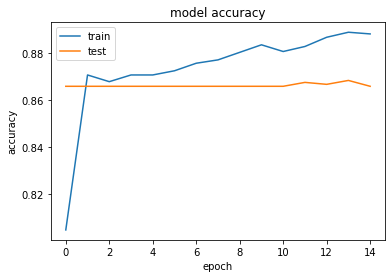

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

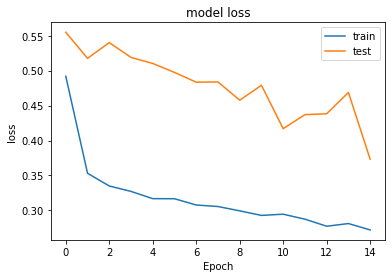

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'])
plt.show()

In [32]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)


In [33]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[1036    3]
 [ 158    3]]


In [34]:
print(accuracy_score(y_true,pred))

0.8658333333333333


# Summary

The above model has a loss of 0.27 and an accuracy of about 88%. 

This model can be successfully used for predicting mortality in ICUs but then one should keep in mind that these values are just predicted values and the predictions can be wrong.

                               